In [ ]:
# IMPORTING NECESSARY LIBRARIES
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

#IMPORTING THE TRANSFER LEARNING MODEL
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


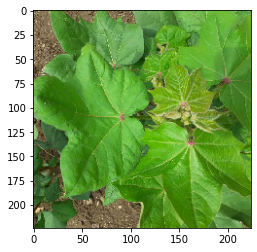

In [ ]:
# SAMPLE IMAGE FROM DATASET
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/My Drive/Deep Learning/cotton_disease/train/diseased cotton plant/dd (20)_iaip.jpg',target_size=(224,224))
plt.imshow(img1)

In [ ]:
# SETTING IMAGE SIZE
imgSize = [224, 224]

In [ ]:
# LOADING TRANSFER LEARNING MODEL
resnet = ResNet50(input_shape=imgSize + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# TO USE THE PRE-TRAINED WEIGHTS
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
classes = glob('/content/drive/My Drive/Deep Learning/cotton_disease/train/*')

In [ ]:
# OUTPUT OF RESNET MODEL
out1 = Flatten()(resnet.output)
prediction = Dense(len(classes), activation='softmax')(out1)

# cCREATE A MODEL OBJECT
model = Model(inputs=resnet.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# COMPILING MODEL
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# IMAGE AUGMENTATION USING IMAGEDATAGENERATO
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Deep Learning/cotton_disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Deep Learning/cotton_disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [ ]:
# CHECKING THE MODEL LAYERS
modelLayers = [ layer.name for layer in model.layers]
print('Layer Name : ',modelLayers)

Layer Name :  ['input_1', 'conv1_pad', 'conv1_conv', 'conv1_bn', 'conv1_relu', 'pool1_pad', 'pool1_pool', 'conv2_block1_1_conv', 'conv2_block1_1_bn', 'conv2_block1_1_relu', 'conv2_block1_2_conv', 'conv2_block1_2_bn', 'conv2_block1_2_relu', 'conv2_block1_0_conv', 'conv2_block1_3_conv', 'conv2_block1_0_bn', 'conv2_block1_3_bn', 'conv2_block1_add', 'conv2_block1_out', 'conv2_block2_1_conv', 'conv2_block2_1_bn', 'conv2_block2_1_relu', 'conv2_block2_2_conv', 'conv2_block2_2_bn', 'conv2_block2_2_relu', 'conv2_block2_3_conv', 'conv2_block2_3_bn', 'conv2_block2_add', 'conv2_block2_out', 'conv2_block3_1_conv', 'conv2_block3_1_bn', 'conv2_block3_1_relu', 'conv2_block3_2_conv', 'conv2_block3_2_bn', 'conv2_block3_2_relu', 'conv2_block3_3_conv', 'conv2_block3_3_bn', 'conv2_block3_add', 'conv2_block3_out', 'conv3_block1_1_conv', 'conv3_block1_1_bn', 'conv3_block1_1_relu', 'conv3_block1_2_conv', 'conv3_block1_2_bn', 'conv3_block1_2_relu', 'conv3_block1_0_conv', 'conv3_block1_3_conv', 'conv3_block1_0_

In [ ]:
img = image.load_img('/content/drive/My Drive/Deep Learning/cotton_disease/train/diseased cotton plant/dd (20)_iaip.jpg', target_size=(224, 224))
img = image.img_to_array(img)
img = preprocess_input(img)
img = np.expand_dims(img, axis=0)

In [ ]:
# CHECKING THE CONVOLUTION OUTPUT
from keras.models import Model
convOutput = Model(inputs=model.input, outputs=model.get_layer('conv1_conv').output)
convFeatures = convOutput.predict(img)

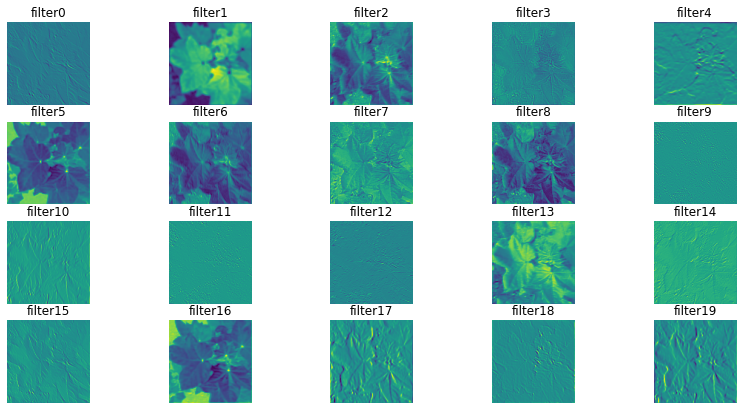

In [ ]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 5
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(convFeatures[0, :, :, i], cmap='viridis')
plt.show()

In [ ]:
# CHECKING THE POOLING OUTPUT
poolingOutput = Model(inputs=model.input,outputs=model.get_layer('pool1_pool').output)
poolingfeatures = poolingOutput.predict(img)

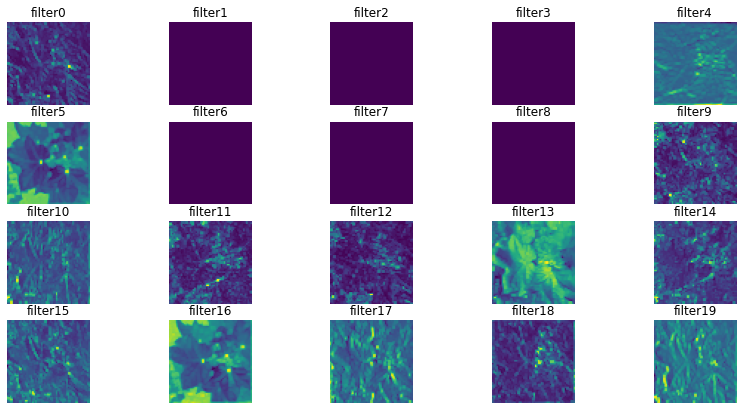

In [ ]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 5
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(poolingfeatures[0, :, :, i], cmap='viridis')
plt.show()

In [ ]:
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  verbose=1,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 631s 10s/step - loss: 4.2811 - accuracy: 0.3008 - val_loss: 1.6900 - val_accuracy: 0.5660
Epoch 2/20
61/61 [==============================] - 36s 589ms/step - loss: 1.1791 - accuracy: 0.5563 - val_loss: 1.1457 - val_accuracy: 0.5660
Epoch 3/20
61/61 [==============================] - 36s 592ms/step - loss: 0.9664 - accuracy: 0.6271 - val_loss: 0.8794 - val_accuracy: 0.6132
Epoch 4/20
61/61 [==============================] - 36s 590ms/step - loss: 0.8670 - accuracy: 0.6632 - val_loss: 1.2109 - val_accuracy: 0.5189
Epoch 5/20
61/61 [==============================] - 36s 587ms/step - loss: 0.7933 - accuracy: 0.6615 - val_loss: 1.0980 - val_accuracy: 0.6038
Epoch 6/20
61/61 [==============================] - 36s 592ms/step - loss: 0.8026 - accuracy: 0.6771 - val_loss: 0.7905 - val_accuracy: 0.6792
Epoch 7/20
61/61 [==============================] - 36s 595ms/step - loss: 0.7413 - accuracy: 0.7187 - val_loss: 1.0064 - val_accuracy: 0.6698


In [ ]:
# SAVING MODEL HISTORY
with open('/content/drive/My Drive/Deep Learning/cotton_disease/histResnet50', 'wb') as f:
  pickle.dump(history.history, f)

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/researchPaperDL/model_resnet50.h5')

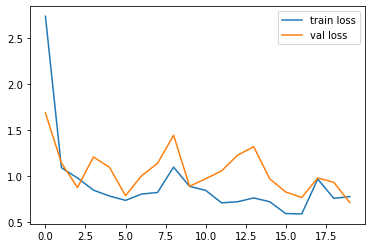

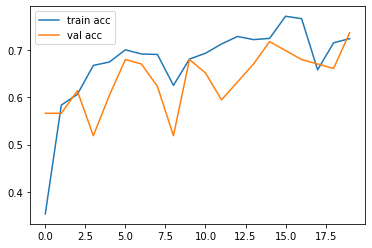

<Figure size 432x288 with 0 Axes>

In [ ]:
# PLOT LOSS
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# PLOT ACCURACY
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
# SAVING MODEL
model.save('/content/drive/MyDrive/researchPaperDL/model_resnet50.h5')

# PREDICTIONS

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [ ]:
model = load_model('/content/drive/MyDrive/researchPaperDL/model_resnet50.h5')

In [ ]:
imgPred = load_img('/content/drive/MyDrive/Deep Learning/cotton_disease/test/diseased cotton plant/dd (21)_iaip.jpg', target_size=(224,224))
imgPred = img_to_array(imgPred)
print(imgPred.shape)

(224, 224, 3)


In [ ]:
imgPred=np.expand_dims(imgPred,axis=0)
imgData=preprocess_input(imgPred)
imgData.shape

(1, 224, 224, 3)

In [ ]:
preds = model.predict(imgData)
print(preds)
preds = np.argmax(preds, axis=1)

[[9.9627328e-01 2.6042949e-11 1.1404243e-03 2.5863366e-03]]


In [ ]:
if preds==0:
  print("The leaf is diseased cotton leaf")
elif preds==1:
  print("The leaf is diseased cotton plant")
elif preds==2:
  print("The leaf is fresh cotton leaf")
else:
  print("The leaf is fresh cotton plant")

The leaf is diseased cotton plant
